<a href="https://colab.research.google.com/github/mojanshadkar/2023_ML_EES/blob/main/Final_project_Water_quality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
pip install shap

In [11]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import shap



In [12]:
df = pd.read_csv('/content/drive/MyDrive/thesis/waterQuality1.csv')
df.head()

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
0,1.65,9.08,0.04,2.85,0.007,0.35,0.83,0.17,0.05,0.20,...,0.054,16.08,1.13,0.007,37.75,6.78,0.08,0.34,0.02,1
1,2.32,21.16,0.01,3.31,0.002,5.28,0.68,0.66,0.90,0.65,...,0.100,2.01,1.93,0.003,32.26,3.21,0.08,0.27,0.05,1
2,1.01,14.02,0.04,0.58,0.008,4.24,0.53,0.02,0.99,0.05,...,0.078,14.16,1.11,0.006,50.28,7.07,0.07,0.44,0.01,0
3,1.36,11.33,0.04,2.96,0.001,7.23,0.03,1.66,1.08,0.71,...,0.016,1.41,1.29,0.004,9.12,1.72,0.02,0.45,0.05,1
4,0.92,24.33,0.03,0.20,0.006,2.67,0.69,0.57,0.61,0.13,...,0.117,6.74,1.11,0.003,16.90,2.41,0.02,0.06,0.02,1


In [13]:
df.shape

(7999, 21)

In [14]:
# Convert non-numeric columns to numeric (if possible)
for col in df.columns:
    if df[col].dtype == 'object':
        try:
            df[col] = pd.to_numeric(df[col], errors='coerce')
        except ValueError:
            print(f"Column '{col}' cannot be converted to numeric.")
    # Drop rows with NaN values in the specified column
    df.dropna(subset=['ammonia'], inplace=True)

# Check data types after conversion
print(df.dtypes)

aluminium      float64
ammonia        float64
arsenic        float64
barium         float64
cadmium        float64
chloramine     float64
chromium       float64
copper         float64
flouride       float64
bacteria       float64
viruses        float64
lead           float64
nitrates       float64
nitrites       float64
mercury        float64
perchlorate    float64
radium         float64
selenium       float64
silver         float64
uranium        float64
is_safe          int64
dtype: object


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7996 entries, 0 to 7998
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   aluminium    7996 non-null   float64
 1   ammonia      7996 non-null   float64
 2   arsenic      7996 non-null   float64
 3   barium       7996 non-null   float64
 4   cadmium      7996 non-null   float64
 5   chloramine   7996 non-null   float64
 6   chromium     7996 non-null   float64
 7   copper       7996 non-null   float64
 8   flouride     7996 non-null   float64
 9   bacteria     7996 non-null   float64
 10  viruses      7996 non-null   float64
 11  lead         7996 non-null   float64
 12  nitrates     7996 non-null   float64
 13  nitrites     7996 non-null   float64
 14  mercury      7996 non-null   float64
 15  perchlorate  7996 non-null   float64
 16  radium       7996 non-null   float64
 17  selenium     7996 non-null   float64
 18  silver       7996 non-null   float64
 19  uraniu

In [16]:
counts = df.is_safe.value_counts()
counts

0    7084
1     912
Name: is_safe, dtype: int64

In [17]:
water_data = df.copy()
# Assuming water_data is your DataFrame after replacements

# Now, separate the features and the labels
X = water_data.iloc[:, :-1]  # Features (all columns except the last one)
y = water_data.iloc[:, -1]   # Target variable (last column)

# Ensure the features (`X`) are numeric for imputation
for col in X.columns:
    X[col] = pd.to_numeric(X[col], errors='coerce')


# Split the data into training and testing sets

# First split: 80% training, 20% for testing + validation
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)

# Second split: Divide the 20% into two parts for validation and testing (10% each of the total data)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)





In [18]:
X_train.shape

(6396, 20)

In [19]:
X_test.shape

(800, 20)

In [20]:
X_val.shape

(800, 20)

In [21]:
X_temp.shape

(1600, 20)

In [22]:
# 1. Define hyperparameter search grid
param_grid = {'max_leaf_nodes':range(2, 121),'min_samples_split': range(2, 11)}
#2.GridSearch
gsc_tree = GridSearchCV(DecisionTreeClassifier(random_state=42),param_grid,cv=3,verbose=1)
# 3. Fit on training set

gsc_tree.fit(X_train,y_train)



Fitting 3 folds for each of 1071 candidates, totalling 3213 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_leaf_nodes': range(2, 121),
                         'min_samples_split': range(2, 11)},
             verbose=1)

In [23]:
best_dt = gsc_tree.best_estimator_
best_dt

DecisionTreeClassifier(max_leaf_nodes=32, min_samples_split=8, random_state=42)

In [24]:
# Make predictions on the training, validation, and test sets with the best model
y_pred_train = best_dt.predict(X_train)
y_pred_val = best_dt.predict(X_val)
y_pred_test = best_dt.predict(X_test)

In [25]:
# Calculate the accuracy scores
accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy_val = accuracy_score(y_val, y_pred_val)
accuracy_test = accuracy_score(y_test, y_pred_test)

# Print the accuracy scores
print(f'Accuracy over training set: {accuracy_train:.2%}\n'
      f'Accuracy over validation set: {accuracy_val:.2%}\n'
      f'Accuracy over test set: {accuracy_test:.2%}')


Accuracy over training set: 96.26%
Accuracy over validation set: 95.00%
Accuracy over test set: 95.25%


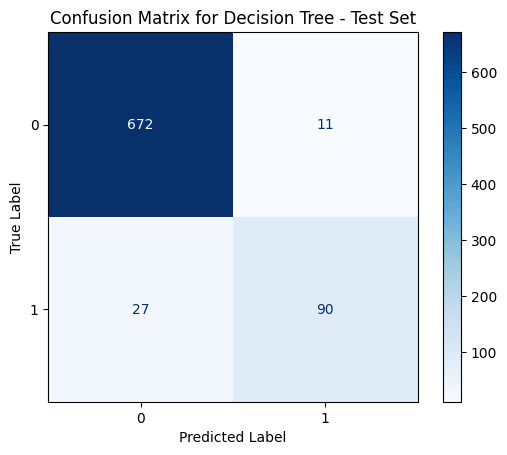

In [26]:
# Confusion Matrix for Test Set
conf_matrix_test = confusion_matrix(y_test, y_pred_test)
disp_test = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_test)
disp_test.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Decision Tree - Test Set')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

Feature importances from the best Decision Tree model:
        Feature  Importance
4       cadmium    0.286984
0     aluminium    0.244950
15  perchlorate    0.189748
1       ammonia    0.064203
19      uranium    0.056379
12     nitrates    0.042739
18       silver    0.024181
9      bacteria    0.021666
16       radium    0.016528
13     nitrites    0.014025
11         lead    0.012112
7        copper    0.007659
17     selenium    0.007602
14      mercury    0.006795
10      viruses    0.004427
5    chloramine    0.000000
6      chromium    0.000000
8      flouride    0.000000
3        barium    0.000000
2       arsenic    0.000000


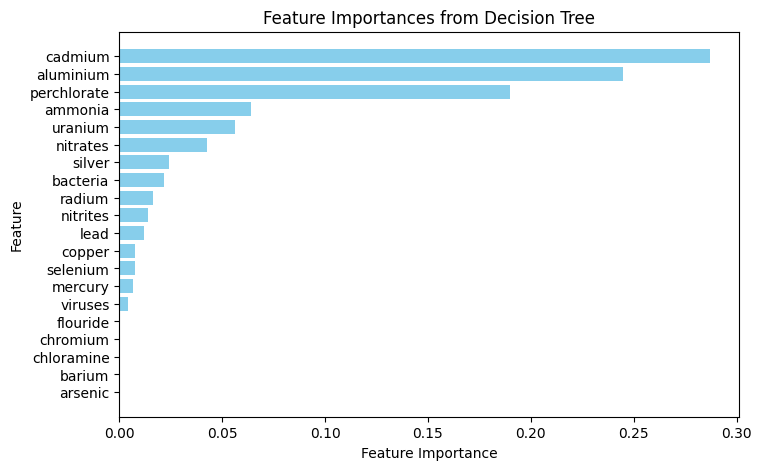

In [27]:
# Get feature importances from the best Decision Tree model found by GridSearchCV

feature_importances = best_dt.feature_importances_

# Create a DataFrame to display feature names and their importance scores
feature_names = water_data.columns[:-1]  # Assuming last column is the target variable, adjust as necessary
importances_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})

# Sort the DataFrame to show the most important features at the top
importances_df.sort_values(by='Importance', ascending=False, inplace=True)

# Display the feature importance DataFrame
print("Feature importances from the best Decision Tree model:")
print(importances_df)


# Assuming 'feature_importances' and 'feature_names' are already defined using the best Decision Tree model

# Sort the features by importance
sorted_idx = feature_importances.argsort()

# Plot the feature importances
plt.figure(figsize=(8, 5))  # Adjust the size as needed
plt.barh(range(len(sorted_idx)), feature_importances[sorted_idx], align='center',color='skyblue')
plt.yticks(range(len(sorted_idx)), feature_names[sorted_idx])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importances from Decision Tree')
plt.show()

In [31]:
# Initialize the Logistic Regression classifier with specified hyperparameters
log_reg_improved = LogisticRegression(solver='liblinear', penalty='l1', C=100, random_state=42)

# Train the classifier on the training data
log_reg_improved.fit(X_train, y_train)

# Make predictions on the test data
log_reg_pred_test_improved = log_reg_improved.predict(X_test)

# Calculate and print the accuracy of the classifier on the test data
log_reg_accuracy_test_improved = accuracy_score(y_test, log_reg_pred_test_improved)
print(f"Improved Logistic Regression Accuracy on Test Set: {log_reg_accuracy_test_improved:.2%}")

# Make predictions on the validation data
log_reg_pred_val_improved = log_reg_improved.predict(X_val)

# Calculate and print the accuracy of the classifier on the validation data
log_reg_accuracy_val_improved = accuracy_score(y_val, log_reg_pred_val_improved)
print(f"Improved Logistic Regression Accuracy on Validation Set: {log_reg_accuracy_val_improved:.2%}")

# Print the classification report to get additional performance metrics for the test set
print("Classification Report for Improved Logistic Regression on Test Set:")
print(classification_report(y_test, log_reg_pred_test_improved))

# Print the classification report for the validation set
print("Classification Report for Improved Logistic Regression on Validation Set:")
print(classification_report(y_val, log_reg_pred_val_improved))


Improved Logistic Regression Accuracy on Test Set: 88.75%
Improved Logistic Regression Accuracy on Validation Set: 91.75%
Classification Report for Improved Logistic Regression on Test Set:
              precision    recall  f1-score   support

           0       0.89      0.99      0.94       683
           1       0.79      0.32      0.45       117

    accuracy                           0.89       800
   macro avg       0.84      0.65      0.69       800
weighted avg       0.88      0.89      0.87       800

Classification Report for Improved Logistic Regression on Validation Set:
              precision    recall  f1-score   support

           0       0.93      0.98      0.96       717
           1       0.71      0.35      0.47        83

    accuracy                           0.92       800
   macro avg       0.82      0.67      0.71       800
weighted avg       0.91      0.92      0.90       800



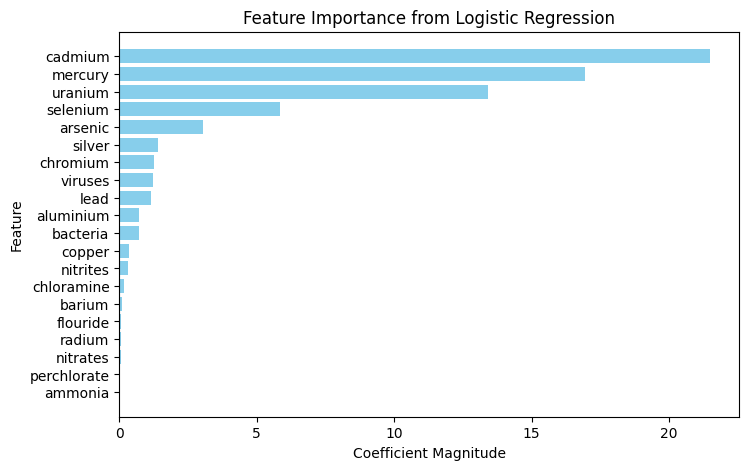

In [32]:
# Retrieving coefficients from the trained model
log_reg_coefs = log_reg_improved.coef_[0]

# Focusing on the magnitude of coefficients to determine importance
importances = np.abs(log_reg_coefs)

# Sort the importances
sorted_indices = np.argsort(importances)

# Plotting the importances
# Plotting the importances
plt.figure(figsize=(8, 5))
plt.title("Feature Importance from Logistic Regression")
plt.barh(range(len(sorted_indices)), importances[sorted_indices], color='skyblue', align='center')
plt.yticks(range(len(sorted_indices)), np.array(feature_names)[sorted_indices]) # Replace feature_names with actual names if available
plt.xlabel("Coefficient Magnitude")
plt.ylabel("Feature")
plt.show()

In [33]:
# Make predictions on the training data
log_reg_pred_train_improved = log_reg_improved.predict(X_train)

# Calculate and print the accuracy of the classifier on the training data
log_reg_accuracy_train_improved = accuracy_score(y_train, log_reg_pred_train_improved)
print(f"Improved Logistic Regression Accuracy on Training Set: {log_reg_accuracy_train_improved:.2%}")


Improved Logistic Regression Accuracy on Training Set: 90.95%


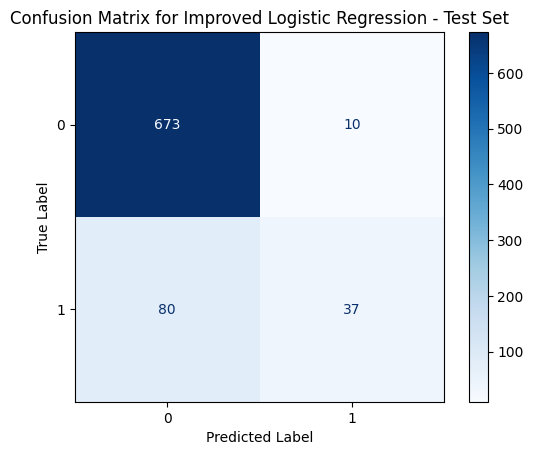

In [34]:
# Create confusion matrices for the test and validation sets
conf_matrix_test_improved = confusion_matrix(y_test, log_reg_pred_test_improved)
conf_matrix_val_improved = confusion_matrix(y_val, log_reg_pred_val_improved)

# Display the confusion matrix for the test set
disp_test_improved = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_test_improved)
disp_test_improved.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Improved Logistic Regression - Test Set')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()



XGBoost Accuracy on Test Set: 96.75%
Classification Report for XGBoost on Test Set:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       683
           1       0.93      0.84      0.88       117

    accuracy                           0.97       800
   macro avg       0.95      0.91      0.93       800
weighted avg       0.97      0.97      0.97       800

XGBoost Accuracy on Training Set: 100.00%
XGBoost Accuracy on Validation Set: 97.00%
Classification Report for XGBoost on Validation Set:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       717
           1       0.92      0.78      0.84        83

    accuracy                           0.97       800
   macro avg       0.95      0.89      0.91       800
weighted avg       0.97      0.97      0.97       800



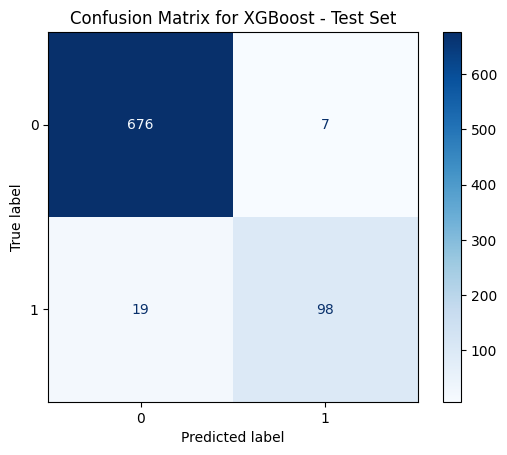

In [35]:


# Assuming X_train, X_val, X_test, y_train, y_val, y_test are already defined

# Initialize the XGBoost classifier
xgb_model = xgb.XGBClassifier(random_state=42)

# Train the classifier on the training data
xgb_model.fit(X_train, y_train)

# Make predictions on the test data
xgb_predictions_test = xgb_model.predict(X_test)

# Calculate and print the accuracy of the classifier on the test data
xgb_accuracy_test = accuracy_score(y_test, xgb_predictions_test)
print(f"XGBoost Accuracy on Test Set: {xgb_accuracy_test:.2%}")

# Print the classification report for the test set
print("Classification Report for XGBoost on Test Set:")
print(classification_report(y_test, xgb_predictions_test))
# Make predictions on the training data
xgb_predictions_train = xgb_model.predict(X_train)

# Calculate and print the accuracy of the classifier on the training data
xgb_accuracy_train = accuracy_score(y_train, xgb_predictions_train)
print(f"XGBoost Accuracy on Training Set: {xgb_accuracy_train:.2%}")
# Make predictions on the validation data
xgb_predictions_val = xgb_model.predict(X_val)

# Calculate and print the accuracy of the classifier on the validation data
xgb_accuracy_val = accuracy_score(y_val, xgb_predictions_val)
print(f"XGBoost Accuracy on Validation Set: {xgb_accuracy_val:.2%}")

# Print the classification report for the validation set
print("Classification Report for XGBoost on Validation Set:")
print(classification_report(y_val, xgb_predictions_val))

# Create and display confusion matrices for the test and validation sets
conf_matrix_test_xgb = confusion_matrix(y_test, xgb_predictions_test)
conf_matrix_val_xgb = confusion_matrix(y_val, xgb_predictions_val)

disp_test_xgb = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_test_xgb)

disp_test_xgb.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for XGBoost - Test Set')
plt.show()



[00:02:13] WARNING: /workspace/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


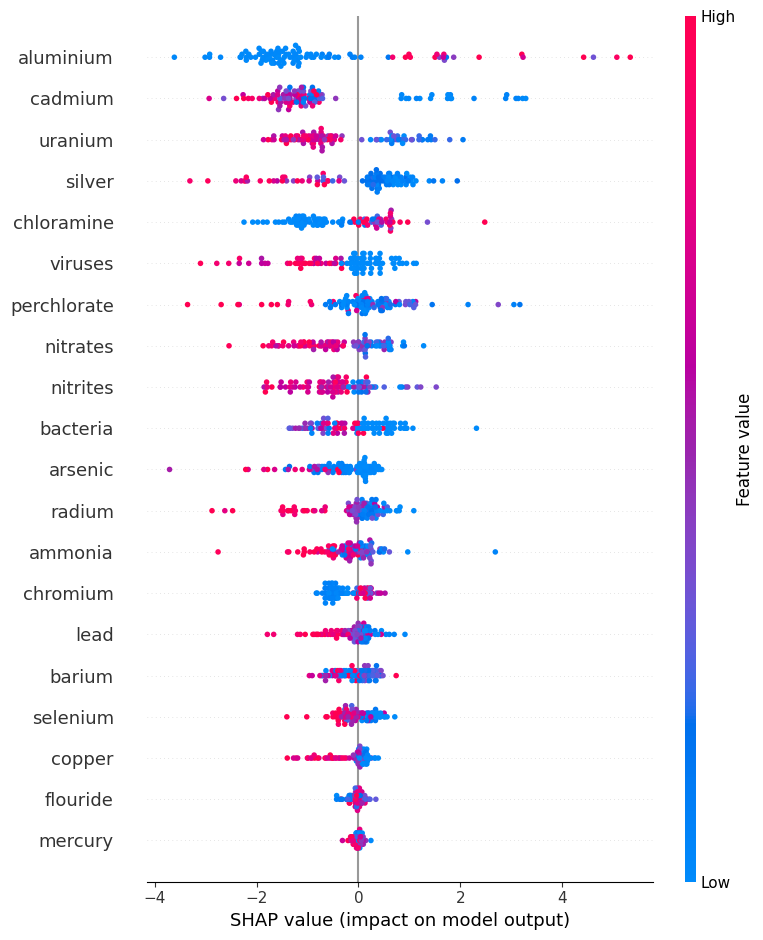

In [36]:
# Create a SHAP explainer object
explainer = shap.Explainer(xgb_model)

# Calculate SHAP values
shap_values = explainer.shap_values(X_train.sample(100, random_state=42))

# Summary plot
shap.summary_plot(shap_values, X_train.sample(100, random_state=42))



In [37]:
df.head()

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
0,1.65,9.08,0.04,2.85,0.007,0.35,0.83,0.17,0.05,0.20,...,0.054,16.08,1.13,0.007,37.75,6.78,0.08,0.34,0.02,1
1,2.32,21.16,0.01,3.31,0.002,5.28,0.68,0.66,0.90,0.65,...,0.100,2.01,1.93,0.003,32.26,3.21,0.08,0.27,0.05,1
2,1.01,14.02,0.04,0.58,0.008,4.24,0.53,0.02,0.99,0.05,...,0.078,14.16,1.11,0.006,50.28,7.07,0.07,0.44,0.01,0
3,1.36,11.33,0.04,2.96,0.001,7.23,0.03,1.66,1.08,0.71,...,0.016,1.41,1.29,0.004,9.12,1.72,0.02,0.45,0.05,1
4,0.92,24.33,0.03,0.20,0.006,2.67,0.69,0.57,0.61,0.13,...,0.117,6.74,1.11,0.003,16.90,2.41,0.02,0.06,0.02,1


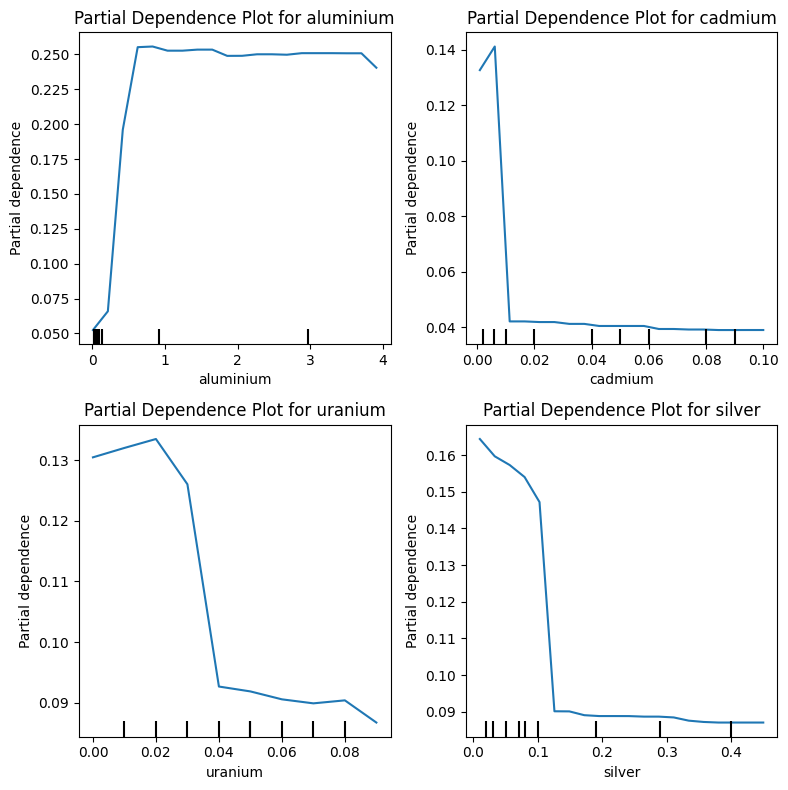

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.inspection import PartialDependenceDisplay
from sklearn.model_selection import train_test_split
import xgboost as xgb

# And assuming 'aluminum', 'cadmium', 'uranium', 'silver' are feature names in your dataset
feature_names = ['aluminium', 'cadmium', 'uranium', 'silver']


fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(8, 8))

# Flatten the axes array for easy indexing
axs = axs.flatten()

# Generate a partial dependence plot for each feature
for i, feature in enumerate(feature_names):
    PartialDependenceDisplay.from_estimator(
        xgb_model,
        X_train,
        features=[feature],
        ax=axs[i],
        grid_resolution=20
    )
    axs[i].set_title(f'Partial Dependence Plot for {feature}')

# Adjust layout for better display
plt.tight_layout()
plt.show()

Feature ranking:
1. cadmium (0.35513564944267273)
2. aluminium (0.0868491381406784)
3. perchlorate (0.0702405497431755)
4. silver (0.05792655795812607)
5. uranium (0.053123172372579575)
6. chloramine (0.039557285606861115)
7. ammonia (0.03827087581157684)
8. bacteria (0.03774433583021164)
9. viruses (0.03520235791802406)
10. nitrates (0.034955158829689026)
11. radium (0.030770225450396538)
12. nitrites (0.028526820242404938)
13. selenium (0.027815453708171844)
14. arsenic (0.02225993387401104)
15. copper (0.018416091799736023)
16. lead (0.018229464069008827)
17. chromium (0.013238057494163513)
18. barium (0.012139343656599522)
19. mercury (0.010611634701490402)
20. flouride (0.00898789893835783)


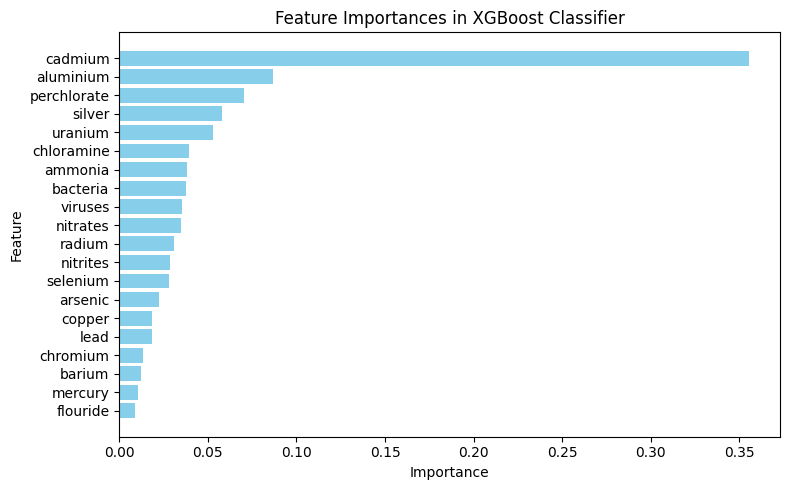

In [39]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import pandas as pd

# ... [previous code for training and predictions] ...

# Get feature importances from the XGBoost model
xgb_feature_importances = xgb_model.feature_importances_

# Get the column names (feature names)
feature_names = water_data.columns[:-1]   # Adjust if feature names are in a different variable

# Create a DataFrame to display importance
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': xgb_feature_importances
})

xgb_feature_importances = xgb_model.feature_importances_

# Sort feature importances in descending order
indices = np.argsort(xgb_feature_importances)[::-1]

# Print feature ranking
print("Feature ranking:")
for f in range(X_train.shape[1]):
    print(f"{f + 1}. {X_train.columns[indices[f]]} ({xgb_feature_importances[indices[f]]})")

# Plot feature importances with feature names in descending order as a horizontal bar plot
plt.figure(figsize=(8, 5))
plt.title("Feature Importances in XGBoost Classifier")
plt.barh(range(X_train.shape[1]), xgb_feature_importances[indices][::-1], align="center", color='skyblue')  # Reverse order
plt.yticks(range(X_train.shape[1]), [X_train.columns[i] for i in indices[::-1]])  # Reverse order for feature names
plt.ylabel("Feature")
plt.xlabel("Importance")
plt.tight_layout()
plt.show()
